In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Cyclistic Bike-Share Analysis

## Project Brief:
- Company activity: Cyclistic is a bike-sharing company that has a fleet of 5,824 bicycles geotracked and locked into a network of 692 stations across Chicago. These bikes can be unlocked from one station and returned to any other station in the system anytime. 
The company offers three flexibility pricing plans: Single-ride passes, full-day passes and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
- Problem: Annual members are much more profitable than casual riders.
- Strategic goal: Maximizing the number of annual memberships by designing marketing strategies aimed at converting casual riders into annual members. 
- Key Stakeholders: Cyclistic executives, Marketing Director (Lily Moreno) and marketing analytics team.


## Ask Phase – Business Task:
- Business Task Statement: Understand how annual members and casual riders use Cyclistic bikes differently so targeted marketing strategies can be recommended for conversion.
- Guiding questions:
    - How do casual riders and annual members differ in their usage patterns?
    - What are the key differences in ride duration, time of day, and day of the week usage?
    - Are there any preferences in bike types used by each group?
    - What are the most popular locations for each group?


## Prepare Phase - Data Sources Description:
- The data is first-party collected directly from Cyclistic’s historical trip data, it is updated regularly, and the data source/license are available.
- The data we will be working with is a public (open) data that is respecting privacy measures considering that we don’t have access to riders’ personally identifiable information. The company is making the data available under a license that allows us to access, reproduce, analyze, copy, modify and distribute the data.
- For our analysis we are using 12 csv files, each of them includes monthly bike rides starting from December 2023 to November 2024.


## Process Phase – Cleaning and Manipulation of Data:
We will be using R to clean and analyze the data as the datasets are too large and it will help us organize, modify and clean dataframes. 

### 1. Install and load all packages:
```{r}
options(repos = "https://cran.rstudio.com")
install.packages("tidyverse")
install.packages("here")
install.packages("fastmap")
install.packages("skimr")
install.packages("janitor")
install.packages("dplyr")
install.packages("lubridate")
install.packages("kableExtra")
```

```{r}
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(dplyr)
library(lubridate)
library(kableExtra)
```

### 2. Import .csv files:
Importing the monthly trips from 12-2023 to 11-2024 into Rstudio by using read_csv and changing their names to make them more understandable. 
```{r}
Dec_2023 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2023_12.csv")
Jan_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_01.csv")
Feb_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_02.csv")
Mar_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_03.csv")
Apr_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_04.csv")
May_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_05.csv")
Jun_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_06.csv")
Jul_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_07.csv")
Aug_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_08.csv")
Sep_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_09.csv")
Oct_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_10.csv")
Nov_2024 <- read_csv("/Users/asmae.addab/Documents/Certifications/ Google_Data_Analytics_Certificate/Capstone_Project/Cyclistic_tripdata_2024/2024_11.csv")
```

### 3. Examine individual datasets:  
```{r}
## Datasets summary
str(Dec_2023)
str(Jan_2024) 
str(Feb_2024)
str(Mar_2024) 
str(Apr_2024)
str(May_2024) 
str(Jun_2024)
str(Jul_2024)
str(Aug_2024)
str(Sep_2024)
str(Oct_2024)
str(Nov_2024)
## Number of each row
rowtotal <- sum(nrow(Dec_2023),nrow(Jan_2024),nrow(Feb_2024),nrow(Mar_2024),nrow(Apr_2024),nrow(May_2024),nrow(Jun_2024),nrow(Jul_2024),nrow(Aug_2024),nrow(Sep_2024),nrow(Oct_2024),nrow(Nov_2024))
print(rowtotal)
```

### 4. Merge all 12 datasets into one dataframe:
```{r}
Full_Year_df <- bind_rows(Dec_2023,Jan_2024,Feb_2024,Mar_2024,Apr_2024,May_2024,Jun_2024,Jul_2024,Aug_2024,Sep_2024,Oct_2024,Nov_2024)
View(Full_Year_df)
```

### 5. Examine the combined dataframe:
```{r}
## Dataframe summary
str(Full_Year_df)
head(Full_Year_df)
## Total number of rows
print(nrow(Full_Year_df))
## Double-checking for errors
### Duplicates
anyDuplicated(Full_Year_df)
### Invalid Data Types
sapply(Full_Year_df, class)
### Missing Values
anyNA(Full_Year_df)
colSums(is.na(Full_Year_df))
```
  
### 6. Examine patterns:
Based on our data examination, we identified a significant number of missing values in station data columns. Before proceeding with data cleaning, we need to examine patterns by rideable_type (classic bike, electric bike, electric scooter) and member_casual (casual, member):
```{r}
## Missing Values Assessment
### Missing start_station_name by rideable_type
Full_Year_df %>%
  filter(is.na(start_station_name)) %>%
  count(rideable_type, name = "missing_start_station_count") %>%
  arrange(desc(missing_start_station_count))
### Missing end_station_name by rideable_type
Full_Year_df %>%
  filter(is.na(end_station_name)) %>%
  count(rideable_type, name = "missing_end_station_count") %>%
  arrange(desc(missing_end_station_count))
### Missing end_lat/end_lng by rideable_type
Full_Year_df %>%
  filter(is.na(end_lat) | is.na(end_lng)) %>%
  count(rideable_type, name = "missing_end_coords_count") %>%
  arrange(desc(missing_end_coords_count))
### Missing start_station_name by member_casual
Full_Year_df %>%
  filter(is.na(start_station_name)) %>%
  count(member_casual, name = "missing_start_station_count") %>%
  arrange(desc(missing_start_station_count))
```
#### Key Observations:
- Station columns: The missing values in "start_station_name", "start_station_id", "end_station_name", and "end_station_id" are primarily due to electric bikes (~93%) and scooters (~6%), which can be parked anywhere, not requiring docking stations. 
- Coordinates: The (7,340 rows, ~0.12%) missing "end_lat"/"end_lng" values for classic_bike trips suggest minor logging errors, possibly at specific stations or due to system issues. 
  - User Patterns: Members have a higher share of missing station data compared to casual riders (61.7% vs. 38.3%), suggesting higher electric vehicle use among members. 

### 7. Clean the dataframe:
```{r}
## Drop station data columns (as they are unreliable for station-based analysis)
Full_Year_df <- Full_Year_df %>%
  select(-c(start_station_name, start_station_id, end_station_name, end_station_id))
## Exclude rows where "end_lat" or "end_lng" are NA (to ensure accurate geospatial mapping)
cat("Removed", sum(is.na(Full_Year_df$end_lat) | is.na(Full_Year_df$end_lng)), "rows with missing end coordinates\n")
Full_Year_df <- Full_Year_df %>%
  filter(!is.na(end_lat) & !is.na(end_lng))
## Remove duplicated rows based on ride_id (to ensure each trip is unique and prevent skewed counts)
rows_before <- nrow(Full_Year_df)
Full_Year_df <- Full_Year_df %>%
  distinct(ride_id, .keep_all = TRUE)
cat("Removed", rows_before - nrow(Full_Year_df), "duplicate rows based on ride_id\n")
## Clean column names (to ensure consistency and compatibility)
Full_Year_df <- clean_names(Full_Year_df)
View(Full_Year_df)
```
#### Key Observations:
- The updated dataset contains 5,898,758 rows and 9 columns, reduced from 5,906,269 rows and 13 columns, by removing 4 station columns, filtering out 7,340 rows with missing coordinates, eliminating 171 duplicate ride_id rows, and standardizing column names.

### 8. Manipulate the dataframe:
```{r}
## Add columns for: Date, Weekday, Day, Month, Year, Time and Ride Duration
Full_Year_df <- Full_Year_df %>%
  mutate(
    date = as.Date(started_at),
    weekday = format(started_at, "%A"),
    day = day(started_at),
    month = format(started_at, "%B"),
    year = as.integer(year(started_at)),
    time = format(started_at, "%H:%M:%S"),
    hour = hour(started_at),
    ride_duration = round(as.numeric(difftime(ended_at, started_at, units = "mins")), 2)
  )
## Round `start_lat`, `start_lng`, `end_lat`, and `end_lng` to 4 decimal places for consistent mapping
Full_Year_df <- Full_Year_df %>%
  mutate(
    start_lat = round(start_lat, 4),
    start_lng = round(start_lng, 4),
    end_lat = round(end_lat, 4),
    end_lng = round(end_lng, 4)
  )
## Rename rideable_type and member_casual to improve clarity
  Full_Year_df <- Full_Year_df %>%
  rename(
    bike_type = rideable_type,
    user_type = member_casual
  )
glimpse(Full_Year_df)
## Check and filter trips with invalid durations
duration_check <- Full_Year_df %>%
  summarise(
    negative_duration = sum(ride_duration < 0, na.rm = TRUE),
    zero_duration = sum(ride_duration == 0, na.rm = TRUE),
    na_duration = sum(is.na(ride_duration))
  )
if (duration_check$negative_duration > 0 || duration_check$zero_duration > 0) {
  Full_Year_df <- Full_Year_df %>%
    filter(ride_duration > 0)
  cat("Filtered", duration_check$negative_duration, "negative and", 
      duration_check$zero_duration, "zero duration rides.\n")
}
## Save cleaned dataset
saveRDS(Full_Year_df, "Full_Year_df_cleaned.rds")
```
#### Key Observations:
- The dataset initially contained 5,898,758 rides. Filtering removed 841 rides (237 negative, 604 zero durations), resulting in 5,897,917 rides.


## Analyze Data
After processing and cleaning the dataset, we calculate key metrics and identify patterns differentiating casual riders and annual members. This supports our business task of enhancing membership conversion strategies. The main steps are outlined below: 

### 1. Calculate total rides and user type breakdown:
```{r}
## Total number of rides
total_rides <- Full_Year_df %>%
  summarise(total_rides = n())
## Rides and percentage per user type
user_breakdown <- Full_Year_df %>%
  count(user_type, name = "user_count") %>%
  mutate(percentage = round((user_count / sum(user_count)) * 100, 2))
## Display results in tables
kable(total_rides, caption = "Total Rides") %>% kable_styling()
kable(user_breakdown, caption = "User Type Breakdown") %>% kable_styling()
```
#### Key Observations:
- Total rides: The dataset contains 5,897,917 rides.
- User type breakdown: Members account for 3,739,306 rides (63.4%), while casual users account for 2,158,611 rides (36.6%), indicating a strong member base for targeted marketing.

### 2. Calculate duration statistics:
```{r}
## Overall average duration
overall_avg_duration <- Full_Year_df %>%
  summarise(
    average_duration = round(mean(ride_duration, na.rm = TRUE), 2),
  )
## Duration statistics by user type
ride_statistics <- Full_Year_df %>%
  group_by(user_type) %>%
  summarise(
    average_duration = round(mean(ride_duration, na.rm = TRUE), 2),
    median_duration = round(median(ride_duration, na.rm = TRUE), 2),
    min_duration = round(min(ride_duration, na.rm = TRUE), 2),
    max_duration = round(max(ride_duration, na.rm = TRUE), 2)
    )
## Display results in tables
kable(overall_avg_duration, caption = "Overall Average Duration") %>% kable_styling()
kable(ride_statistics, caption = "Duration Statistics by User Type") %>% kable_styling()
```
#### Key Observations:
- Overall average duration: The average ride duration across all Cyclistic users is 15.48 minutes.
- By user type:
  - Average: Casual riders average 21.09 minutes per trip, significantly longer than members who average 12.23 minutes. This represents an ~8.86-minute difference.
  - Median: The typical (median) ride duration for casual users is 12.00 minutes, which is also considerably higher than members' median of 8.69 minutes, a gap of ~3.31 minutes.
  - Maximum: Both user types exhibit extreme maximum ride durations (Casual: 1509.37 minutes; Member: 1499.93 minutes), indicating the presence of outliers that heavily influence the average.
  - Minimum: Both user types have a minimum ride duration of 0.01 minutes (~0.6 seconds), which could represent very short trips or data recording anomalies.
#### Data Insights: 
- The notable difference in average and median ride durations strongly suggests a divergence in primary usage patterns: casual riders likely favor longer, potentially leisure or exploratory trips, while members' shorter durations are more consistent with regular commuting or utilitarian use.
- The significant impact of maximum ride durations on the average highlights the median as a more robust indicator of typical ride behavior for both casual and member user types.
- The presence of extremely short rides (0.01 min) warrants consideration. While some may be valid, their frequency and context should be explored to understand their nature as either genuine quick trips or potential data artifacts.

### 3. Outlier and anomaly investigation: 
```{r}
## Outliers (>120 minutes)
### Count outliers
high_outliers_count <- Full_Year_df %>%
  filter(ride_duration > 120) %>%
  count(user_type, name = "high_outliers_count") %>%
  mutate(percentage = sprintf("%.2f", round((high_outliers_count / sum(high_outliers_count)) * 100, 2)))
### Sample top 5 outliers per user type
high_outliers_details <- Full_Year_df %>%
  filter(ride_duration > 120) %>%
  arrange(desc(ride_duration)) %>%
  group_by(user_type) %>%
  slice_head(n = 5) %>%
  ungroup() %>%
  select(ride_id, user_type, ride_duration, started_at, ended_at, start_lat, start_lng, end_lat, end_lng)
### Count outliers with identical start/end coordinates
identical_coords_high_outliers <- Full_Year_df %>%
  filter(ride_duration > 120) %>%
  group_by(user_type) %>%
  summarise(identical_coords_count = sum(start_lat == end_lat & start_lng == end_lng, na.rm = TRUE)) %>%
  mutate(total_high_outliers = sum(.$identical_coords_count), # Use ungrouped total
         percentage_identical = sprintf("%.2f", round((identical_coords_count / sum(.$identical_coords_count)) * 100, 2)))
## Outliers (<1 minute)
### Count outliers
low_outliers_count <- Full_Year_df %>%
  filter(ride_duration < 1) %>%
  count(user_type, name = "low_outliers_count") %>%
  mutate(percentage = sprintf("%.2f", round((low_outliers_count / sum(low_outliers_count)) * 100, 2)))
### Sample top 5 outliers per user type
low_outliers_details <- Full_Year_df %>%
  filter(ride_duration < 1) %>%
  arrange(desc(ride_duration)) %>%
  group_by(user_type) %>%
  slice_head(n = 5) %>%
  ungroup() %>%
  select(ride_id, user_type, ride_duration, started_at, ended_at, start_lat, start_lng, end_lat, end_lng)
### Count outliers with identical start/end coordinates
identical_coords_low_outliers <- Full_Year_df %>%
  filter(ride_duration < 1) %>%
  group_by(user_type) %>%
  summarise(identical_coords_count = sum(start_lat == end_lat & start_lng == end_lng, na.rm = TRUE)) %>%
  mutate(total_low_outliers = sum(.$identical_coords_count),  # Use ungrouped total
         percentage_identical = sprintf("%.2f", round((identical_coords_count / sum(.$identical_coords_count)) * 100, 2)))
## Display results in tables
kable(high_outliers_count, caption = "High Outliers Count") %>% kable_styling()
kable(high_outliers_details, caption = "Top 5 High Outliers Details per User Type") %>% kable_styling()
kable(identical_coords_high_outliers, caption = "Identical Coordinates High Outliers") %>% kable_styling()
kable(low_outliers_count, caption = "Low Outliers Count") %>% kable_styling()
kable(head(low_outliers_details, 5), caption = "Top 5 Low Outliers Details per User Type") %>% kable_styling()
kable(identical_coords_low_outliers, caption = "Identical Coordinates Low Outliers") %>% kable_styling()
```
To ensure our duration findings accurately reflect typical behavior, an analysis of ride duration outliers (rides > 120 minutes & rides < 1 minute) was conducted.
#### Key Observations:
- Outliers (>120 minutes):
  - Outlier counts: A total of 35,548 rides exceeds 120 minutes. Casual riders account for the vast majority of these extended trips, representing 80.26% (28,530 rides), compared to 19.74% (7,018 rides) from members.
  - Outlier details: Both casual (1509.37 minutes) and member (1499.93 minutes) riders exhibit extreme maximum ride durations with some rides exhibiting identical start/end coordinates (e.g.: 41.9466, -87.6946).
  - Identical coordinates: Among these high outliers, 8,706 rides (~0.15% of total rides) feature identical start and end coordinates (7,526 casual, 1,180 member). 
- Outliers (<1 minute):
  - Outlier counts: A total of 131,944 rides were under 1 minute. The distribution of these very short trips is nearly even, with casual riders accounting for 49.35% (65,113 trips) and members for 50.65% (66,831 trips).
  - Outlier details: These low outliers consistently show ride durations just under 1 minute (0.99 minutes) and frequently feature identical or nearly identical start and end geographical coordinates (e.g.: 41.9300, -87.6400).
  - Identical coordinates: Among these low outliers, 90,275 rides (1.53% of total rides) exhibit identical start and end geographical coordinates. Casual riders account for 54.82% (49,486 trips) of these specific anomalies, while members account for 45.18% (40,789 trips). 
#### Data Insights:
- Outliers (>120 minutes):
  - The overwhelming dominance of casual users among rides exceeding two hours strongly indicates their greater propensity for leisure-driven or exploratory trips. This contrasts sharply with members' usage, reinforcing a core difference in how each group engages with the bike share service. While a subset of these long rides, particularly those with identical start/end coordinates, might point to potential system anomalies or data artifacts (e.g., faulty docking during a very long trip), their impact on overall average ride durations is minimal (0.6% of total rides), so no adjustment is applied. This means that the primary finding – that casual riders frequently take significantly longer trips – remains robust and actionable for conversion strategies. 
- Outliers (<1 minute):
  - The nearly even distribution of these extremely short rides across both user types, coupled with their frequent identical start/end coordinates, strongly suggests they stem from common factors affecting all riders. These likely represent data recording errors, accidental checkouts, or immediate re-docking attempts due to issues, rather than genuine travel trips. This finding is more relevant for system diagnostics and data quality improvement than for differentiating member vs. casual usage patterns to drive conversion strategies.
Given the limited impact of high and low outliers and high outliers on differentiating usage, it makes sense to pivot to analyses that better highlight behavioral differences between casual and member users.

### 4. Analyze time-based trends in bike usage:
```{r}
## Define ordered factors for month and weekday
Full_Year_df <- Full_Year_df %>%
  mutate(
    month = factor(month, levels = c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December")),
    weekday = factor(weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")))
## Ride count per user type by month 
count_month <- Full_Year_df %>%
  group_by(month, user_type) %>%
  summarise(total_rides = n()) %>%
  arrange(month, user_type)
## Ride count per user type by weekday
count_weekday <- Full_Year_df %>% 
  group_by(weekday, user_type) %>% 
  summarise(total_rides = n()) %>% 
  arrange(weekday, user_type)
## Ride count per user type by hour
count_hour <- Full_Year_df %>% 
  group_by(hour, user_type) %>% 
  summarise(total_rides = n()) %>% 
  arrange(hour, user_type)
## Display ride counts per month, weekday and hour across both users
kable(count_month, caption = "Ride Count per User Type by Month") %>% kable_styling()
kable(count_weekday, caption = "Ride Count per User Type by Weekday") %>% kable_styling()
kable(count_hour, caption = "Ride Count per User Type by Hour") %>% kable_styling()
```
#### Key Observations:
- Month: Both member and casual rides are peaking in September at 474,282 and 345,874 respectively. However, casual rides drop sharply to just 24,339 by January, while member rides decline more gradually to 120,149.
- Weekday: Member rides peak on Wednesdays (617,738) and are lowest on Sundays (418,953), while casual rides peak on Saturdays (447,481) and hit their lowest on Tuesdays (231,410).
- Hour: Both members and casuals reach their highest ride counts at 5 PM, with members having 395,814 rides and casuals 204,332 rides. Members show clear peaks during early morning and late afternoon hours, while casual rides are more evenly spread throughout the afternoon. Ride volumes drop sharply after 9 PM for both users.
#### Data Insights:
- Although both groups ride more in warmer months, casual users show a steeper seasonal drop, indicating more weather-sensitive and recreational behavior. Members maintain steadier usage, likely reflecting routine or commuting habits.
- Members show a strong weekday usage pattern, likely driven by work commutes. In contrast, casual riders are more active on weekends, pointing to leisure-driven behavior with minimal weekday use.
- The strong morning and evening peaks suggest members mainly use the service for commuting purposes. In contrast, the more evenly distributed casual ride pattern indicates leisure or flexible usage rather than strict travel times. Low overnight activity highlights limited demand during late hours across both groups.

### 5. Compare bike type preferences across user types:
```{r}
## Calculate total rides per bike type and user type
bike_usage_count <- Full_Year_df %>% 
  group_by(bike_type, user_type) %>% 
  summarise(total_rides = n())
## Calculate average ride duration per bike type and user type
bike_usage_avg_duration <- Full_Year_df %>% 
  group_by(bike_type, user_type) %>% 
  summarise(avg_duration = round(mean(ride_duration, na.rm = TRUE), 2))
## Display total and average rides by bike types
kable(bike_usage_count, caption = "Total Rides by Bike Type Across User Types") %>% kable_styling()
kable(bike_usage_avg_duration, caption  = "Average Ride by Bike Type Across User Types") %>% kable_styling()
```
#### Key Observation:
- Bike usage count: Electric bikes are the most popular choice across both user types, with 1,097,153 rides by casual users and 1,894,242 rides by members, significantly outnumbering classic bikes (976,243 casual, 1,785,942 member) and electric scooters (85,215 casual, 59,122 member).
- Bike usage average: Casual riders consistently have a longer average ride duration than annual members across all bike types. The largest duration gap between user types is observed for classic bikes (casual: 29.28 mins vs. member: 13.43 mins), while electric scooters show the shortest average duration for both groups (casual: 11.94 mins vs. member: 8.24 mins).
#### Data Insight:
- Annual members are the high-frequency users, driving significantly more total rides across all bike types compared to casuals, likely for consistent, goal-oriented trips (e.g., commuting or errands). While both user types strongly prefer electric bikes, casual riders consistently take significantly longer average trips across all bike types (especially classic bikes), suggesting their usage leans more towards leisure or exploratory purposes. These distinctions in frequency and duration of use, despite shared bike type preferences, are crucial for tailoring conversion strategies. 
  
### 6. Geospatial analysis to identify usage patterns:
#### 6.1. Activity hotspot identification (Start & End Points):
```{r}
## Ride counts by start coordinates and user type
start_hotspots <- Full_Year_df %>% 
  group_by(start_lat, start_lng, user_type) %>% 
  summarise(start_ride_count = n()) %>% 
  arrange(desc(start_ride_count))
## Ride counts by end coordinates and user type
end_hotspots <- Full_Year_df %>% 
  group_by(end_lat, end_lng, user_type) %>% 
  summarise(end_ride_count = n()) %>% 
  arrange(desc(end_ride_count))
## Display top 10 start and end hotspots
kable(head(start_hotspots, 10), caption = "Top 10 Start Hotspots by User Type") %>% kable_styling()
kable(head(end_hotspots, 10), caption = "Top 10 End Hotspots by User Type") %>% kable_styling()
```
#### Key Observation:
- Hotspot location differences & concentration: Analysis of ride start and end coordinates reveals distinct hotspot clusters for casual versus annual members. Casual riders account for a higher number of total rides within the identified top 10 hotspots, with specific high-count clusters at coordinates such as (41.8923, -87.6120) and (41.8810, -87.6167). Annual members, while having higher overall total rides, show their highest-count clusters in distinct areas identified by coordinates like (41.8892, -87.6385) and (41.8834, -87.6412), indicating a more distributed pattern of activity compared to casual riders' concentration in specific top locations. This geographical separation is evident for both ride starts and ends.
#### Data Insight:
- The striking concentration of casual rider activity in specific hotspots (e.g., coordinates near Navy Pier or the Lakefront Trail) suggests casual users frequently return to and prioritize these locations for leisure or tourism activities. This contrasts with members' more distributed usage across locations, including areas consistent with business and residential zones, indicative of commuting or regular utilitarian trips. This geographical divergence in usage patterns provides a valuable foundation for developing location-based targeted marketing strategies for conversion.
  
#### 6.2. Temporal trends within geospatial hotspots:
```{r}
## Define top 10 hotspots accross both user
hotspots <- Full_Year_df %>%
  group_by(user_type, start_lat, start_lng) %>%
  summarise(ride_count = n(), .groups = "drop") %>%
  arrange(user_type, desc(ride_count))
top_10_casual <- hotspots %>% 
  filter(user_type == "casual") %>% 
  slice_head(n = 10)
top_10_member <- hotspots %>% 
  filter(user_type == "member") %>% 
  slice_head(n = 10)
top_10_hotspots <- bind_rows(top_10_casual, top_10_member)
## Peak weekdays and hours in top 10 hotspots
hotspots_peak_time <- Full_Year_df %>% 
  inner_join(top_10_hotspots, by = c("start_lat", "start_lng", "user_type")) %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(start_lat, start_lng, user_type, hour, weekday) %>%
  summarise(ride_count = n()) %>% 
  group_by(start_lat, start_lng, user_type) %>% 
  slice(which.max(ride_count)) %>% 
  arrange(desc(ride_count))
## Hotspots during peak days and hour
### Filter rides for peak days (Members: Wednesday / Casuals: Saturday)
peak_day_hotspots <- Full_Year_df %>% 
  filter((user_type == "casual" & weekday == "Saturday") | (user_type == "member" & weekday == "Wednesday")) %>% 
  group_by(start_lat, start_lng, user_type, weekday) %>% 
  summarise(peak_day_ride_count = n()) %>% 
  arrange(desc(peak_day_ride_count))
### Filter rides for peak hour (17)
peak_hour_hotspots <- Full_Year_df %>% 
  filter(hour == 17) %>% 
  group_by(start_lat, start_lng, user_type, hour) %>% 
  summarise(peak_hour_ride_count = n()) %>% 
  arrange(desc(peak_hour_ride_count))
## Display temporal trends tables 
kable(top_10_hotspots, caption = "Top 10 Hotspots") %>% kable_styling()
kable(hotspots_peak_time, caption = "Peak Hours and Days in Top 10 Hotspots") %>% kable_styling()
kable(head(peak_day_hotspots, 10), caption = "Top 10 Hotspots by Peak Days") %>% kable_styling()
kable(head(peak_hour_hotspots, 10), caption = "Top 10 Hotspots by Peak Hour") %>% kable_styling()
```
#### Key Observations:
- Peak day/hour in top 10 hotspots: Casual riders exhibit their highest activity in the top 10 hotspots mostly on Saturdays between 14:00 and 16:00 (e.g.: 1,390 rides at 41.8923, -87.6120 at 15:00). Conversely, member riders show peak activity predominantly on Wednesdays and Tuesdays between 16:00 and 17:00 (e.g.: 1,176 rides at 41.8800, -87.6400 at 16:00), with an additional morning peak at 8:00 on Tuesday (377 rides at 41.9030, -87.6313).
- Top 10 hotspots by peak days: When focusing on peak days (Saturdays for casuals and Wednesday for members), 6 of the top 10 hotspots are associated with casual riders with the highest ride count of 12,163 at 41.8923, -87.6120. The remaining 4 hotspots are associated with member riders, with the highest ride count of 4,886 at 41.8834, -87.6412. 
- Top 10 Hotspots by Peak Hour: Analysis of hotspots peaking at 17:00 reveals that 8 of the top 10 entries are associated with member riders, including 3,505 rides at 41.8834, -87.6412. Casual riders account for the remaining 2 hotspots with 4,548 rides at 41.8923, -87.6120 and 2,700 rides at 41.8810, -87.6167. 
#### Data Insight:
- Casual riders are most active in specific recreational spots on weekends and during afternoons/evenings, suggesting they use the service for leisure or tourism. In contrast, annual members show peak usage primarily in business/residential areas on weekdays during typical commute times (Morning and 17:00), indicating they rely on bikes for utilitarian or commuting purposes. This clear difference in when and where each group rides provides a robust foundation for developing highly targeted marketing campaigns, allowing promotions to be tailored to specific geographic locations at the precise times casual riders are most active, thereby maximizing conversion potential. 
    

## Share Data
Based on our data analysis, we will use Tableau for our visualizations to create interactive maps, charts, and dashboards that highlight usage patterns and support membership conversion strategies. 

### Export data for Tableau visualizations: 
```{r}
## Export key analysis outputs as CSV files
### Set output directory
output_dir <- "/Users/asmae.addab/Documents/Certifications/\ Google_Data_Analytics_Certificate/Capstone_Project/Tableau_Data"
### Total Rides
write_csv(total_rides, file.path(output_dir, "total_rides.csv"))
### User type breakdown
write_csv(user_breakdown, file.path(output_dir, "user_type_breakdown.csv"))
### Overall Average Duration
write_csv(overall_avg_duration, file.path(output_dir, "overall_avg_duration.csv"))
### Duration statistics by user type
write_csv(ride_statistics, file.path(output_dir, "duration_statistics_by_user_type.csv"))
### Time-based trends
write_csv(count_month, file.path(output_dir, "ride_count_by_month.csv")) 
write_csv(count_weekday, file.path(output_dir, "ride_count_by_weekday.csv")) 
write_csv(count_hour, file.path(output_dir, "ride_count_by_hour.csv"))
### Bike type usage
write_csv(bike_usage_count, file.path(output_dir, "bike_type_usage_count.csv"))
write_csv(bike_usage_avg_duration, file.path(output_dir, "bike_type_avg_duration.csv"))
### Geospatial hotspots
write_csv(start_hotspots, file.path(output_dir, "start_hotspots.csv")) 
write_csv(end_hotspots, file.path(output_dir, "end_hotspots.csv"))
### Temporal trends in hotspots
write_csv(top_10_hotspots, file.path(output_dir, "top_10_hotspots.csv"))
write_csv(hotspots_peak_time, file.path(output_dir, "hotspots_peak_time.csv"))
write_csv(peak_day_hotspots, file.path(output_dir, "peak_day_hotspots.csv"))
write_csv(peak_hour_hotspots, file.path(output_dir, "peak_hour_hotspots.csv"))
### Sample of the dataset (100,000 rows)
set.seed(123) # For reproducibility 
Full_Year_df_sample <- Full_Year_df %>% sample_n(100000) 
write_csv(Full_Year_df_sample, file.path(output_dir, "full_year_df_sample.csv"))
### Full dataset
write_csv(Full_Year_df, file.path(output_dir, "full_year_df.csv"))
```

The final dashboard is published in Tableau public (Link: “https://public.tableau.com/app/profile/asmae.addab/viz/GoogleCapstoneProject_CyclisticBike-ShareAnalysis/Dashboard3")


## Project Recommendations:
- Boost Member Conversion: Target casual riders in weekend/leisure hotspots with promotions and trial memberships to encourage annual subscriptions.
- Optimize Bike Allocation:  Prioritize electric bike availability at casual hotspots on weekends and member hotspots on weekdays.
- Seasonal & Location-Based Campaigns: Run promotions during spring/summer and near high-traffic recreational areas to maximize casual rider engagement.
- Enhance System Reliability: Strengthen docking station maintenance to prevent short and long rides and ensure reliability at high-traffic hotspots for both user types.
- Tailor Engagement by User Behavior: Send personalized offers to members for weekday commutes and to casual riders for weekend leisure trips, aligned with peak hours.
- Plan for Growth & Maintenance: Use hotspot and duration trends to guide station placement, bike type distribution, and maintenance scheduling.
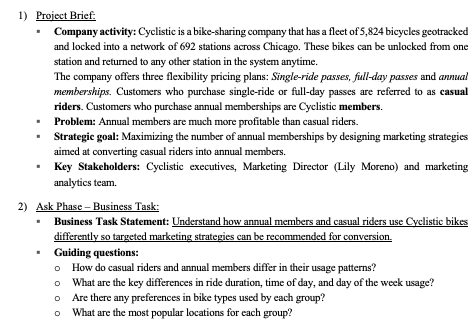
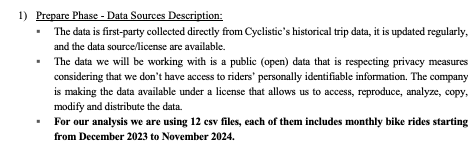
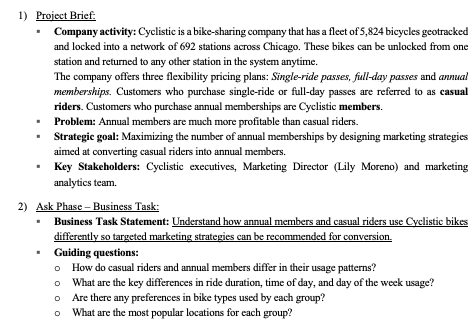
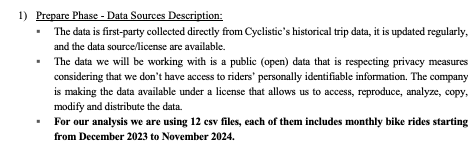
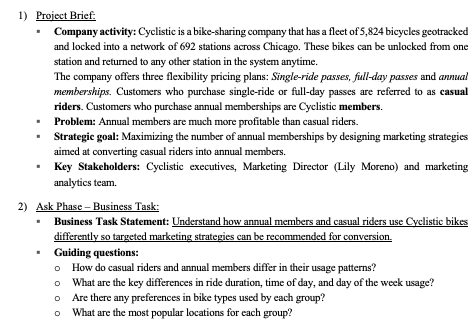
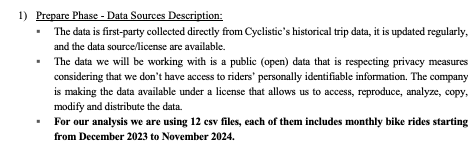
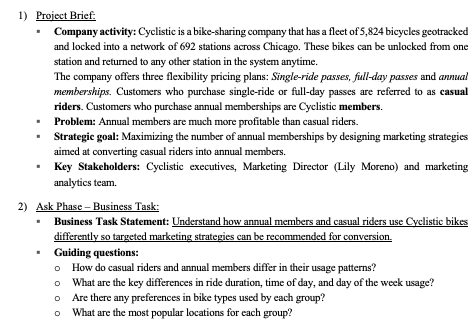
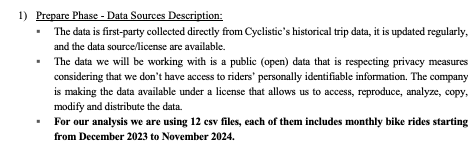